In [4]:
from dotenv import load_dotenv

In [5]:
load_dotenv()

True

In [6]:
## interacting with llms
import os
from langchain.chat_models import init_chat_model

model_name = os.getenv('MODEL_NAME')
model_provider = os.getenv('MODEL_PROVIDER')


In [7]:
llm = init_chat_model(model=model_name, model_provider=model_provider)

In [8]:
llm.invoke("What is capital of France?")

AIMessage(content='The capital of France is **Paris**.', additional_kwargs={}, response_metadata={'is_blocked': False, 'safety_ratings': [], 'usage_metadata': {'prompt_token_count': 6, 'candidates_token_count': 8, 'total_token_count': 14, 'prompt_tokens_details': [{'modality': 1, 'token_count': 6}], 'candidates_tokens_details': [{'modality': 1, 'token_count': 8}], 'thoughts_token_count': 0, 'cached_content_token_count': 0, 'cache_tokens_details': []}, 'finish_reason': 'STOP', 'avg_logprobs': -0.004736664704978466, 'model_provider': 'google_vertexai', 'model_name': 'gemini-2.5-flash-lite'}, id='lc_run--b1a4c5a1-23d8-4adc-b227-24f24cf4f25e-0', usage_metadata={'input_tokens': 6, 'output_tokens': 8, 'total_tokens': 14, 'input_token_details': {'cache_read': 0}})

In [9]:
## Messages
from langchain_core.messages import HumanMessage, SystemMessage, AIMessage

messages = [
    SystemMessage("You are expert in math"),
    HumanMessage("How to find a lowest point in calculus ?")
]

In [10]:
response = llm.invoke(messages)

In [11]:
type(response)

langchain_core.messages.ai.AIMessage

In [12]:
print(response.content)

In calculus, finding the lowest point of a function is a crucial task, and it's typically done by analyzing the **critical points** of the function and its **behavior**. Here's a breakdown of the process:

**1. Understanding the Concept: Local vs. Global Minima**

Before diving into methods, it's important to distinguish between:

*   **Local Minimum (or Relative Minimum):** A point where the function's value is lower than at all *nearby* points. Imagine a valley in a hilly landscape.
*   **Global Minimum (or Absolute Minimum):** The absolute lowest value the function can take over its entire domain. This is the deepest point in the entire landscape.

**2. The Power of the Derivative**

The first derivative of a function, $f'(x)$, tells us about the **slope** of the tangent line to the function at any given point.

*   **Where the slope is zero ($f'(x) = 0$):** This indicates a horizontal tangent line. These are potential locations for local minima or maxima.
*   **Where the slope is u

In [13]:
from langchain_core.prompts import PromptTemplate, ChatPromptTemplate

In [14]:
prompt = PromptTemplate.from_template("You are expert in {area}. Explain in 3 sentences what is {topic}")

In [15]:
prompt.invoke({'area': 'physics', 'topic': 'inertia'})

StringPromptValue(text='You are expert in physics. Explain in 3 sentences what is inertia')

In [16]:
chain = prompt | llm

In [17]:
response = chain.invoke({'area': 'physics', 'topic': 'inertia'})

In [19]:
response.pretty_print()

================================== Ai Message ==================================

Inertia is the inherent property of all matter that resists changes in its state of motion. This means an object at rest will stay at rest, and an object in motion will continue in motion with the same speed and in the same direction, unless acted upon by an external force. The greater an object's mass, the more inertia it possesses, and thus the more difficult it is to alter its motion.


In [20]:
prompt = ChatPromptTemplate([
    ("system", "you are expert in {area}. Explain the question asked in plain english"),
    ("user", "What is {topic}.")
])

In [21]:
chain = prompt | llm

In [22]:
response = chain.invoke({'area': 'maths', 'topic': 'trignometry'})

In [ ]:
response.pretty_print()

================================== Ai Message ==================================

Trigonometry is a branch of mathematics that studies the relationships between the sides and angles of triangles.

Think of it like this:

*   **Triangles are everywhere!** From the shape of a roof to the way a ladder leans against a wall, triangles are fundamental shapes in the world around us.
*   **Trigonometry helps us measure things we can't easily reach.** Imagine trying to find the height of a tall tree or the distance across a river. You can't just use a ruler! Trigonometry provides the tools to calculate these distances and heights indirectly by measuring angles and known lengths.

**The core idea is this:**

If you know some of the angles and some of the side lengths of a triangle, you can use trigonometry to figure out the rest of the unknown angles and side lengths.

**It's all about specific "trig" functions:**

Trigonometry is built around a few special functions (like sine, cosine, and tang

: 

In [3]:
from typing import TypedDict, Literal
from langgraph.graph import StateGraph, START, END

In [4]:
class MathState(TypedDict):
    a: int
    b: int
    op: Literal["add", "sub"] 
    result: int

In [5]:
def add(state: MathState) -> MathState:
    state['result'] = state['a'] + state['b']
    return state

In [6]:
def sub(state: MathState) -> MathState:
    state['result'] = state['a'] - state['b']
    return state

In [7]:
def route(state: MathState) -> Literal["add_node", "sub_node"]:
    if state["op"] == "add":
        return "add_node"
    else:
        return "sub_node"

In [8]:
math_graph = StateGraph(MathState)
math_graph.add_node("add_node", add)
math_graph.add_node("sub_node", sub)
math_graph.add_conditional_edges(START, route)
math_graph.add_edge("add_node", END)
math_graph.add_edge("sub_node", END)

In [9]:
graph = math_graph.compile()

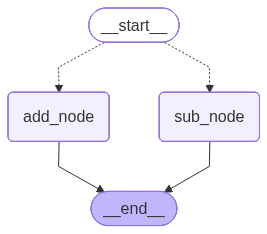

In [10]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

In [11]:
state = MathState(a=10, b=5, op='add')
result = graph.invoke(state)
print(result)

{'a': 10, 'b': 5, 'op': 'add', 'result': 15}


In [12]:
state = MathState(a=10, b=5, op='sub')
result = graph.invoke(state)
print(result)

{'a': 10, 'b': 5, 'op': 'sub', 'result': 5}


In [14]:
def is_add(state: MathState) -> bool:
    if state["op"] == "add":
        return True
    else:
        return False

In [15]:
math_graph = StateGraph(MathState)
math_graph.add_node("add_node", add)
math_graph.add_node("sub_node", sub)
math_graph.add_conditional_edges(
    START, 
    is_add, 
    { True: 'add_node', False: 'sub_node'}
)
math_graph.add_edge("add_node", END)
math_graph.add_edge("sub_node", END)

In [ ]:
new_graph = math_graph.compile()


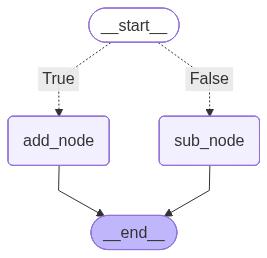

In [17]:
from IPython.display import Image, display

display(Image(new_graph.get_graph().draw_mermaid_png()))

In [18]:
state = MathState(a=10, b=5, op='sub')
result = new_graph.invoke(state)
print(result)

{'a': 10, 'b': 5, 'op': 'sub', 'result': 5}


In [19]:
f = lambda s: "add_node" if s['op'] == 'add' else "sub_node"

In [21]:
f(MathState(op='add'))

'add_node'

In [29]:
math_graph = StateGraph(MathState)
math_graph.add_node("add_node", add)
math_graph.add_node("sub_node", sub)
math_graph.add_conditional_edges(
    START, 
    lambda s: "add_node" if s['op'] == 'add' else "sub_node")
math_graph.add_edge("add_node", END)
math_graph.add_edge("sub_node", END)
graph = math_graph.compile()

In [30]:
state = MathState(a=10, b=5, op='add')
result = graph.invoke(state)
print(result)

{'a': 10, 'b': 5, 'op': 'add', 'result': 15}


In [31]:
math_graph = StateGraph(MathState)
math_graph.add_node("add_node", add)
math_graph.add_node("sub_node", sub)
math_graph.add_conditional_edges(
    START, 
    lambda s: True if s['op'] == 'add' else False,
    {
        True: 'add_node',
        False: 'sub_node'
    })
math_graph.add_edge("add_node", END)
math_graph.add_edge("sub_node", END)
new_graph=math_graph.compile()

In [33]:
state = MathState(a=10, b=5, op='sub')
result = new_graph.invoke(state)
print(result)

{'a': 10, 'b': 5, 'op': 'sub', 'result': 5}


In [ ]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [3]:
class ArthimeticState(TypedDict):
    value1: int
    value2: int
    sum: int
    product: int
    quotient: int
    remainder: int


In [11]:
def add(state: ArthimeticState) -> ArthimeticState:
    state['sum'] = 10 + 3
    #state['value1'] + state['value2']
    return state

def multiply(state: ArthimeticState) -> ArthimeticState:
    state['product'] = 10 * 3
    #state['value1'] * state['value2']
    return state

def integer_div(state: ArthimeticState) -> ArthimeticState:
    state['quotient'] = 10 // 3
    #state['value1'] // state['value2']
    return state


def modulus(state: ArthimeticState) -> ArthimeticState:
    state['remainder'] = 10 % 3
    #state['value1'] % state['value2']
    return state


In [12]:
arthemetic_graph = StateGraph(ArthimeticState)

# nodes
arthemetic_graph.add_node("sum", add)
arthemetic_graph.add_node("product", multiply)
arthemetic_graph.add_node("quotient", integer_div)
arthemetic_graph.add_node("remainder", modulus)

# edges
arthemetic_graph.add_edge(START, "sum")
arthemetic_graph.add_edge(START, "product")
arthemetic_graph.add_edge(START, "quotient")
arthemetic_graph.add_edge(START, "remainder")


arthemetic_graph.add_edge("sum", END)
arthemetic_graph.add_edge("product", END)
arthemetic_graph.add_edge("quotient", END)
arthemetic_graph.add_edge("remainder", END)

graph = arthemetic_graph.compile()

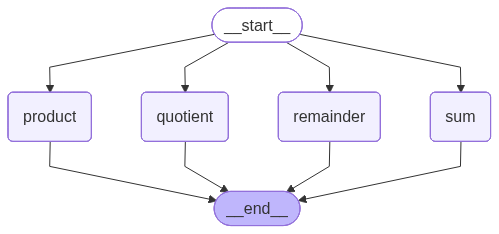

In [15]:
from IPython.display import Image, display

display(Image(graph.get_graph(xray=True).draw_mermaid_png()))

In [17]:
problem = ArthimeticState()
result = graph.invoke(problem)
print(result)

{'sum': 13, 'product': 30, 'quotient': 3, 'remainder': 1}
